In [44]:
import pandas as pd
import datetime as datetime
import os
import  plotly.express as px

In [55]:
data_file='data/WORLD-US-ASIA-THAI.csv'
if os.path.exists(data_file):
 print(f"Found {os.path.abspath(data_file)}")
else:
 raise FileNotFoundError(f"Not found file {data_file}")   


Found D:\PythonDev\MyQuantFinProject\MyYoutube-Demo\data\WORLD-US-ASIA-THAI.csv


In [56]:
from_str='2022-12-16'
to_str='2023-01-13' 
timeframe='W-FRI'

In [57]:

dfAll=pd.read_csv(data_file)
dfAll.info()
dfAll.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     546 non-null    object 
 1   Date/Time  546 non-null    object 
 2   open       546 non-null    float64
 3   high       546 non-null    float64
 4   low        546 non-null    float64
 5   close      546 non-null    float64
 6   volume     546 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 30.0+ KB


,Ticker,Date/Time,open,high,low,close,volume
541,TDEX.BK,09/01/2023,10.01,10.10,10.01,10.07,385700
542,TDEX.BK,10/01/2023,10.07,10.12,10.05,10.07,180200
543,TDEX.BK,11/01/2023,10.08,10.08,10.00,10.02,191000
544,TDEX.BK,12/01/2023,10.04,10.06,9.99,10.02,301300
545,TDEX.BK,13/01/2023,10.03,10.06,9.95,9.98,597500


In [58]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df=df.rename(columns={'Ticker':'symbol','close':'price'})
df=df.loc[from_str:to_str,['symbol','price']]
df.tail()

,symbol,price
date,,
2023-01-09,TDEX.BK,10.07
2023-01-10,TDEX.BK,10.07
2023-01-11,TDEX.BK,10.02
2023-01-12,TDEX.BK,10.02
2023-01-13,TDEX.BK,9.98


In [59]:
list_symbol=df['symbol'].unique().tolist() 
print(list_symbol)

['ACWI', 'SPY', 'AAXJ', 'TDEX.BK']


In [60]:
symbol='ACWI'
colsROC=['symbol','date','pct_change']
df_Pct_Price=pd.DataFrame(columns=colsROC)
df_Pct_Price

,symbol,date,pct_change


In [61]:
for symbol_name in list_symbol:

    dfx_symbol=df.query('symbol==@symbol_name')

    dfx_px=dfx_symbol.resample(timeframe).last()
    dfx_px=dfx_px.reset_index()

    dfx_px['pct_change']=dfx_px['price'].pct_change()*100
    dfx_px['pct_change']=dfx_px['pct_change'].round(2)

    dfx_px=dfx_px.dropna() # the first  rown 
    dfx_px=dfx_px.drop(columns=['price']) # remove price becase we are focuse ROC of Price
    dfx_px=dfx_px[colsROC]
    print(f"Calculate ROC of {symbol}")
    print(dfx_px)
    
    df_Pct_Price=pd.concat([df_Pct_Price,dfx_px],ignore_index=True,axis=0)
    

Calculate ROC of ACWI
  symbol       date  pct_change
1   ACWI 2022-12-23        0.16
2   ACWI 2022-12-30       -0.21
3   ACWI 2023-01-06        2.58
4   ACWI 2023-01-13        3.01
Calculate ROC of ACWI
  symbol       date  pct_change
1    SPY 2022-12-23       -0.09
2    SPY 2022-12-30       -0.13
3    SPY 2023-01-06        1.48
4    SPY 2023-01-13        2.69
Calculate ROC of ACWI
  symbol       date  pct_change
1   AAXJ 2022-12-23       -0.66
2   AAXJ 2022-12-30        0.43
3   AAXJ 2023-01-06        6.14
4   AAXJ 2023-01-13        2.88
Calculate ROC of ACWI
    symbol       date  pct_change
1  TDEX.BK 2022-12-23        0.00
2  TDEX.BK 2022-12-30        2.99
3  TDEX.BK 2023-01-06        0.00
4  TDEX.BK 2023-01-13       -0.20


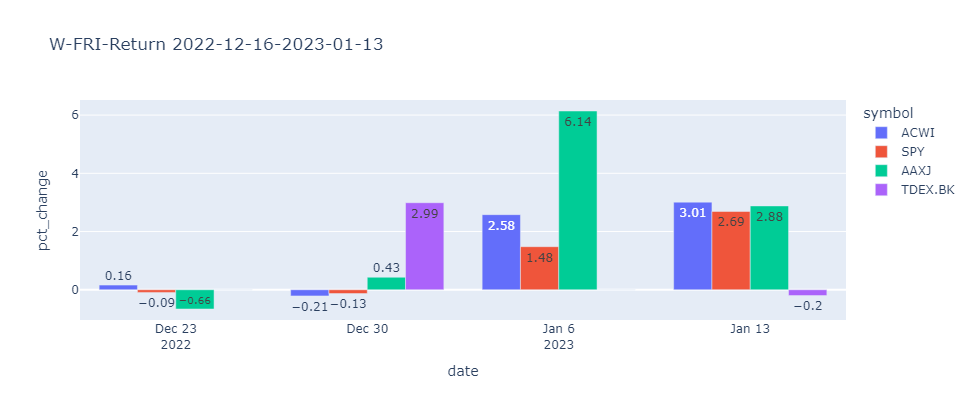

In [62]:
fig = px.bar(df_Pct_Price, x="date", y="pct_change",text_auto=True,
             color='symbol', barmode='group',title=f"{timeframe}-Return {from_str}-{to_str}",
             width=1000,height=400)
fig.show()

In [66]:
dfSum_Pct_Price=df_Pct_Price.groupby(['symbol'])[['pct_change']].sum()
dfSum_Pct_Price.reset_index(drop=False,inplace=True)
dfSum_Pct_Pric=dfSum_Pct_Price.sort_values(by="pct_change",ascending=False)
print(dfSum_Pct_Price)

    symbol  pct_change
0     AAXJ        8.79
1     ACWI        5.54
2      SPY        3.95
3  TDEX.BK        2.79


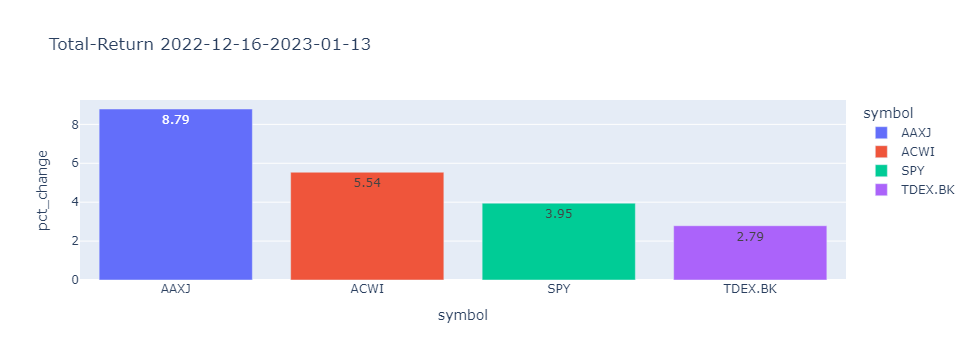

In [67]:
fig = px.bar(dfSum_Pct_Price, x="symbol", y="pct_change",text_auto=True,
                   title=f"Total-Return {from_str}-{to_str}",color='symbol')
fig.show()